In [22]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du
FIGURES_PATH = du.get_figures_path("rats", "cohort1")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# ANIMALS
ANIMAL_IDS = ["R010", "R011", "R012"]

# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)
few_days_ago = (datetime.today() - timedelta(days=5)).strftime("%Y-%m-%d")
today = datetime.today().date()

In [24]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

[2023-11-20 20:42:59,870][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 21 sessions for R010 between 2023-10-31 and 2023-11-20
fetched 21 sessions for R011 between 2023-10-31 and 2023-11-20
fetched 21 sessions for R012 between 2023-10-31 and 2023-11-20


In [25]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )
f_name = "R012-_days_df.csv"

# days_df.to_csv(du.DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=du.DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(du.DATA_PATH / f_name)

partial dj load with new date min 2023-10-31 -> 2023-11-20
Returning appended df with entries between 2023-10-31 and 2023-11-20
Saved out appended df to C:\Users\JB\github\jbreda_animal_training\data\days_dfs\R012-_days_df.csv


In [26]:
trials_df.columns

Index(['trial', 'animal_id', 'date', 'sess_id', 'result', 'hits', 'violations',
       'temperror', 'hit_rate', 'error_rate', 'violation_rate',
       'temp_error_rate', 'n_lpokes', 'n_cpokes', 'n_rpokes', 'trial_dur',
       'trial_start', 'valid_early_spoke', 'first_spoke', 'first_lpoke',
       'first_rpoke', 'n_settling_ins', 'avg_settling_in', 'cpoke_dur',
       'stage', 'curriculum', 'sides', 'SMA_set', 'is_match', 'sa', 'sb',
       'stimuli_on', 'settling_in_dur', 'legal_cbreak_dur', 'pre_dur',
       'adj_pre_dur', 'stimulus_dur', 'delay_dur', 'post_dur', 'sb_extra_dur',
       'viol_off_dur', 'pre_go_dur', 'inter_trial_dur', 'go_type', 'go_dur',
       'give_type_set', 'give_type_imp', 'give_frac', 'give_delay_dur',
       'give_xtra_light_delay_dur', 'give_use', 'replay_on', 'timeouts',
       'water_delivered', 'give_water_not_drunk', 'crash_hist',
       'was_block_swtich', 'volume_multiplier', 'l_water_vol', 'r_water_vol',
       'ab_l_prob', 'ab_r_prob', 'ab_beta', 'ab_

In [27]:
trials_df.groupby("animal_id").pro_anti_hit_thresh.unique()

animal_id
R010    [nan, 0.55]
R011    [nan, 0.55]
R012    [nan, 0.55]
Name: pro_anti_hit_thresh, dtype: object

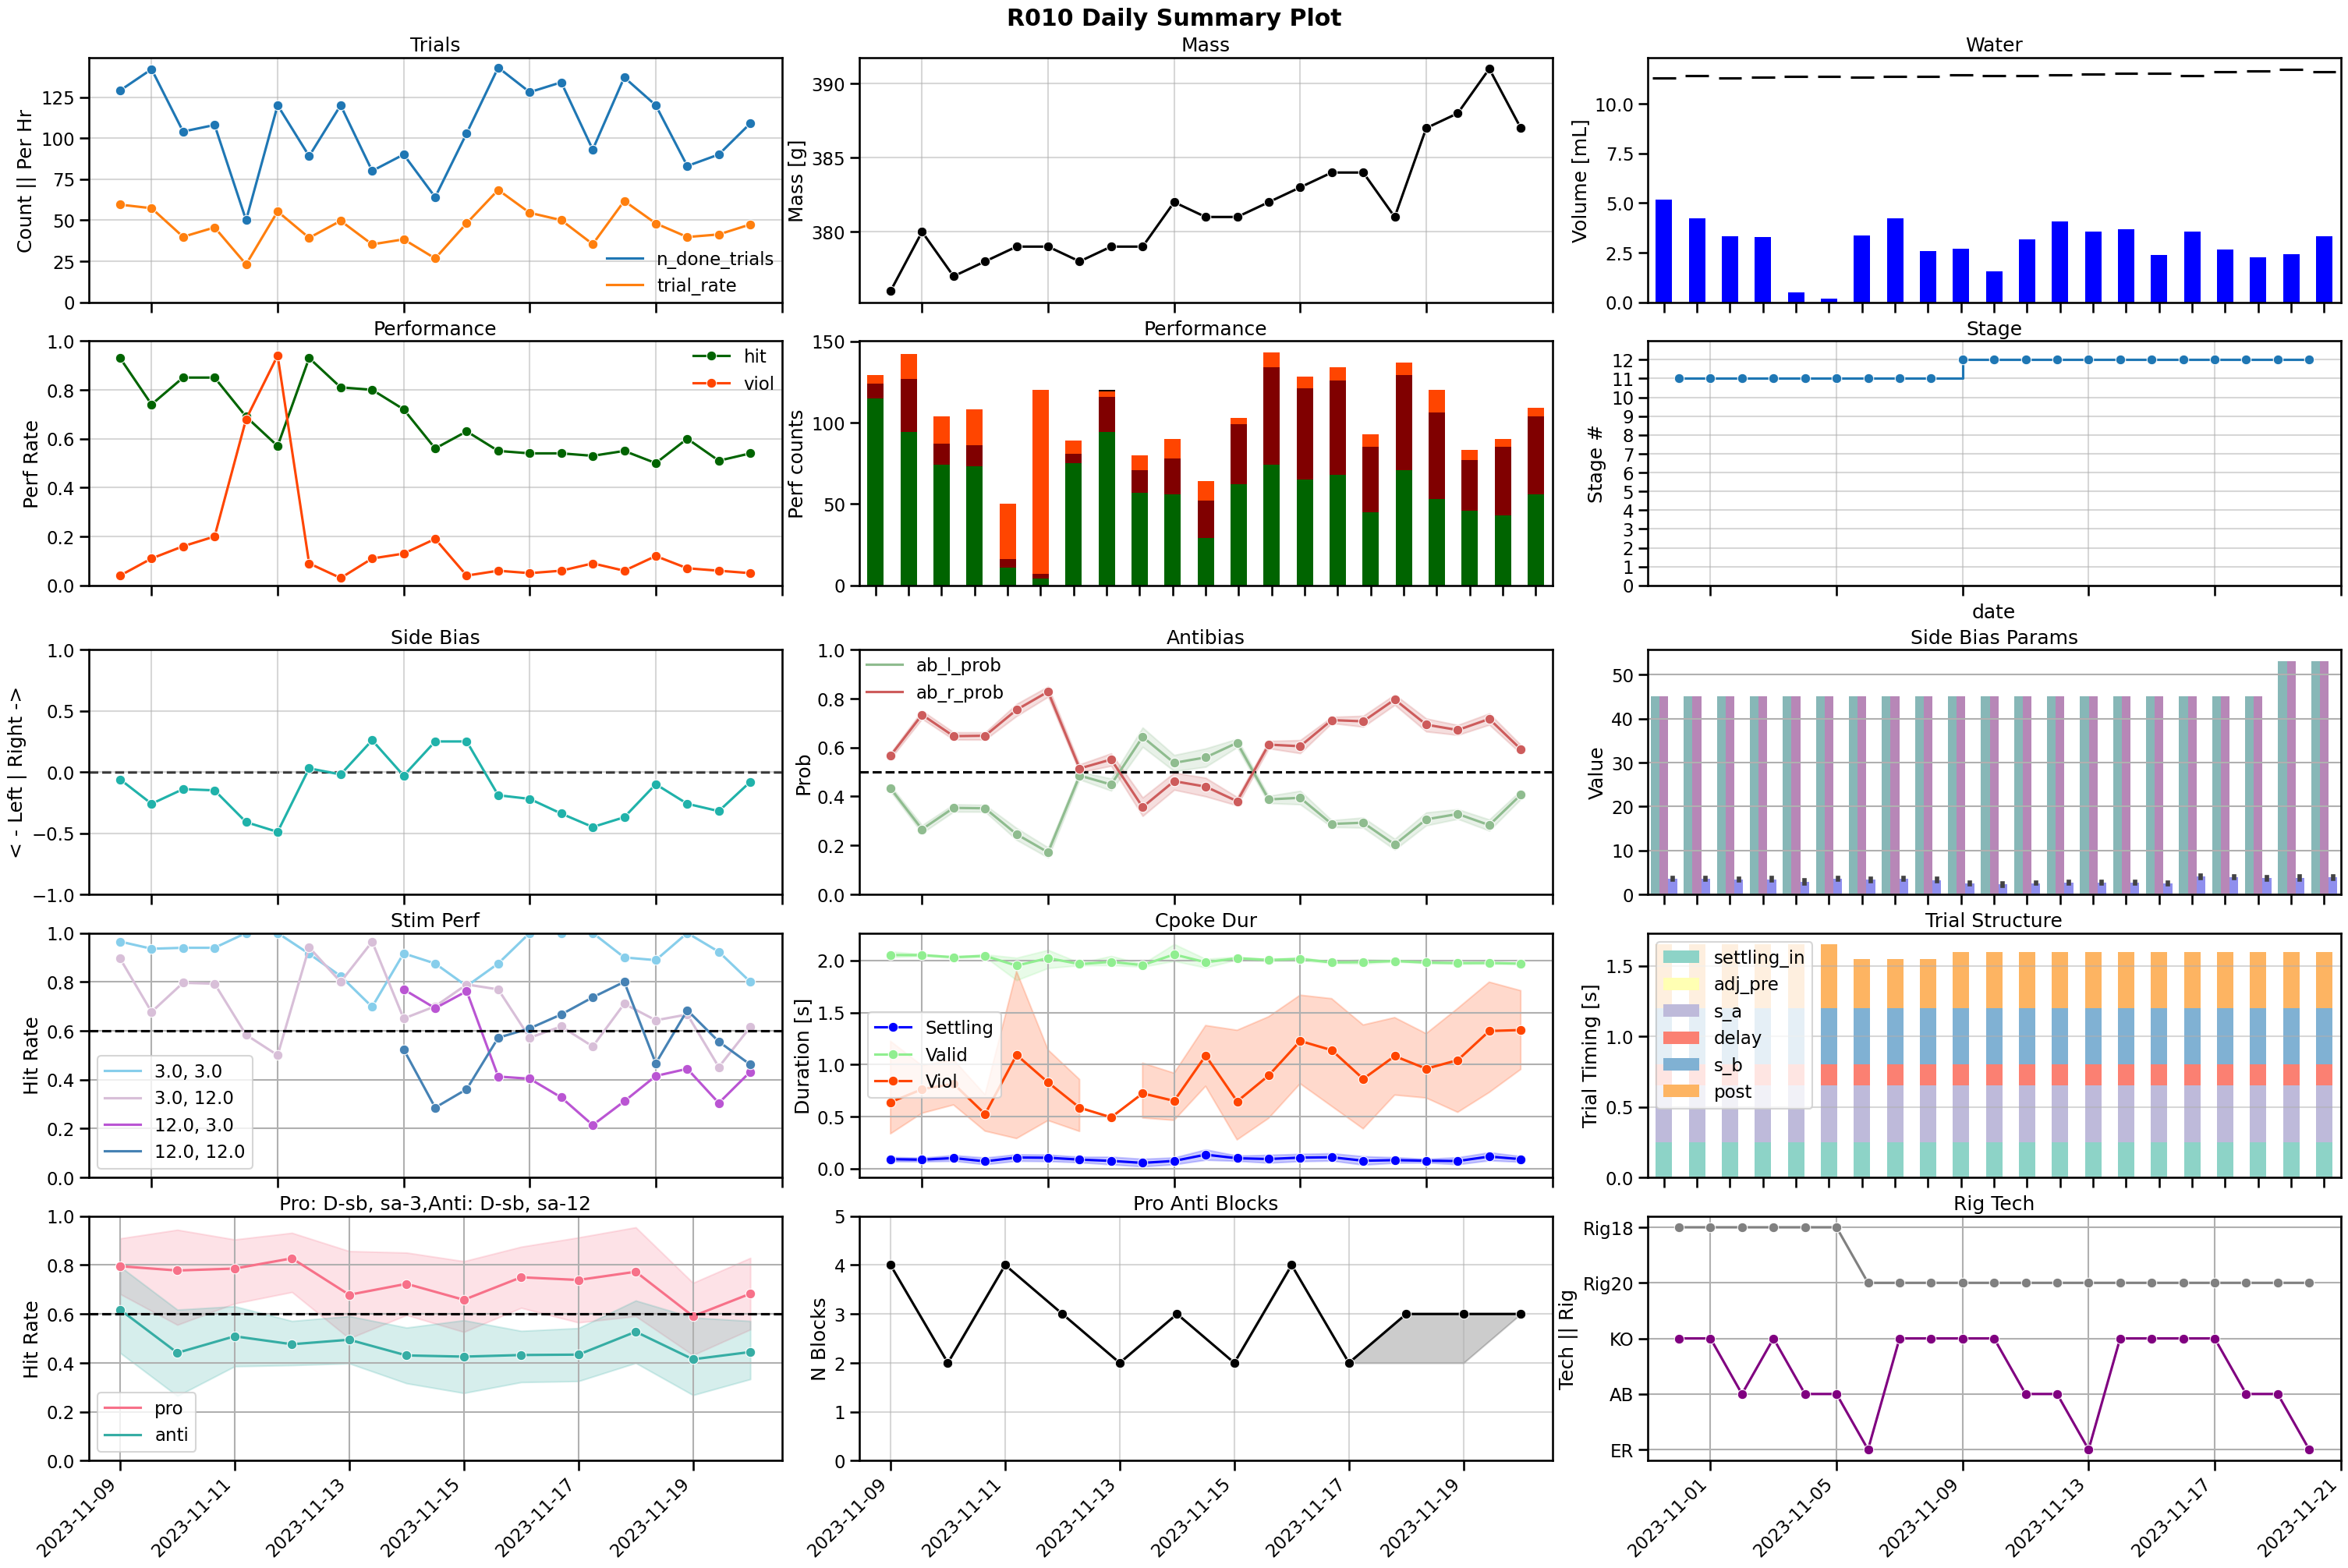

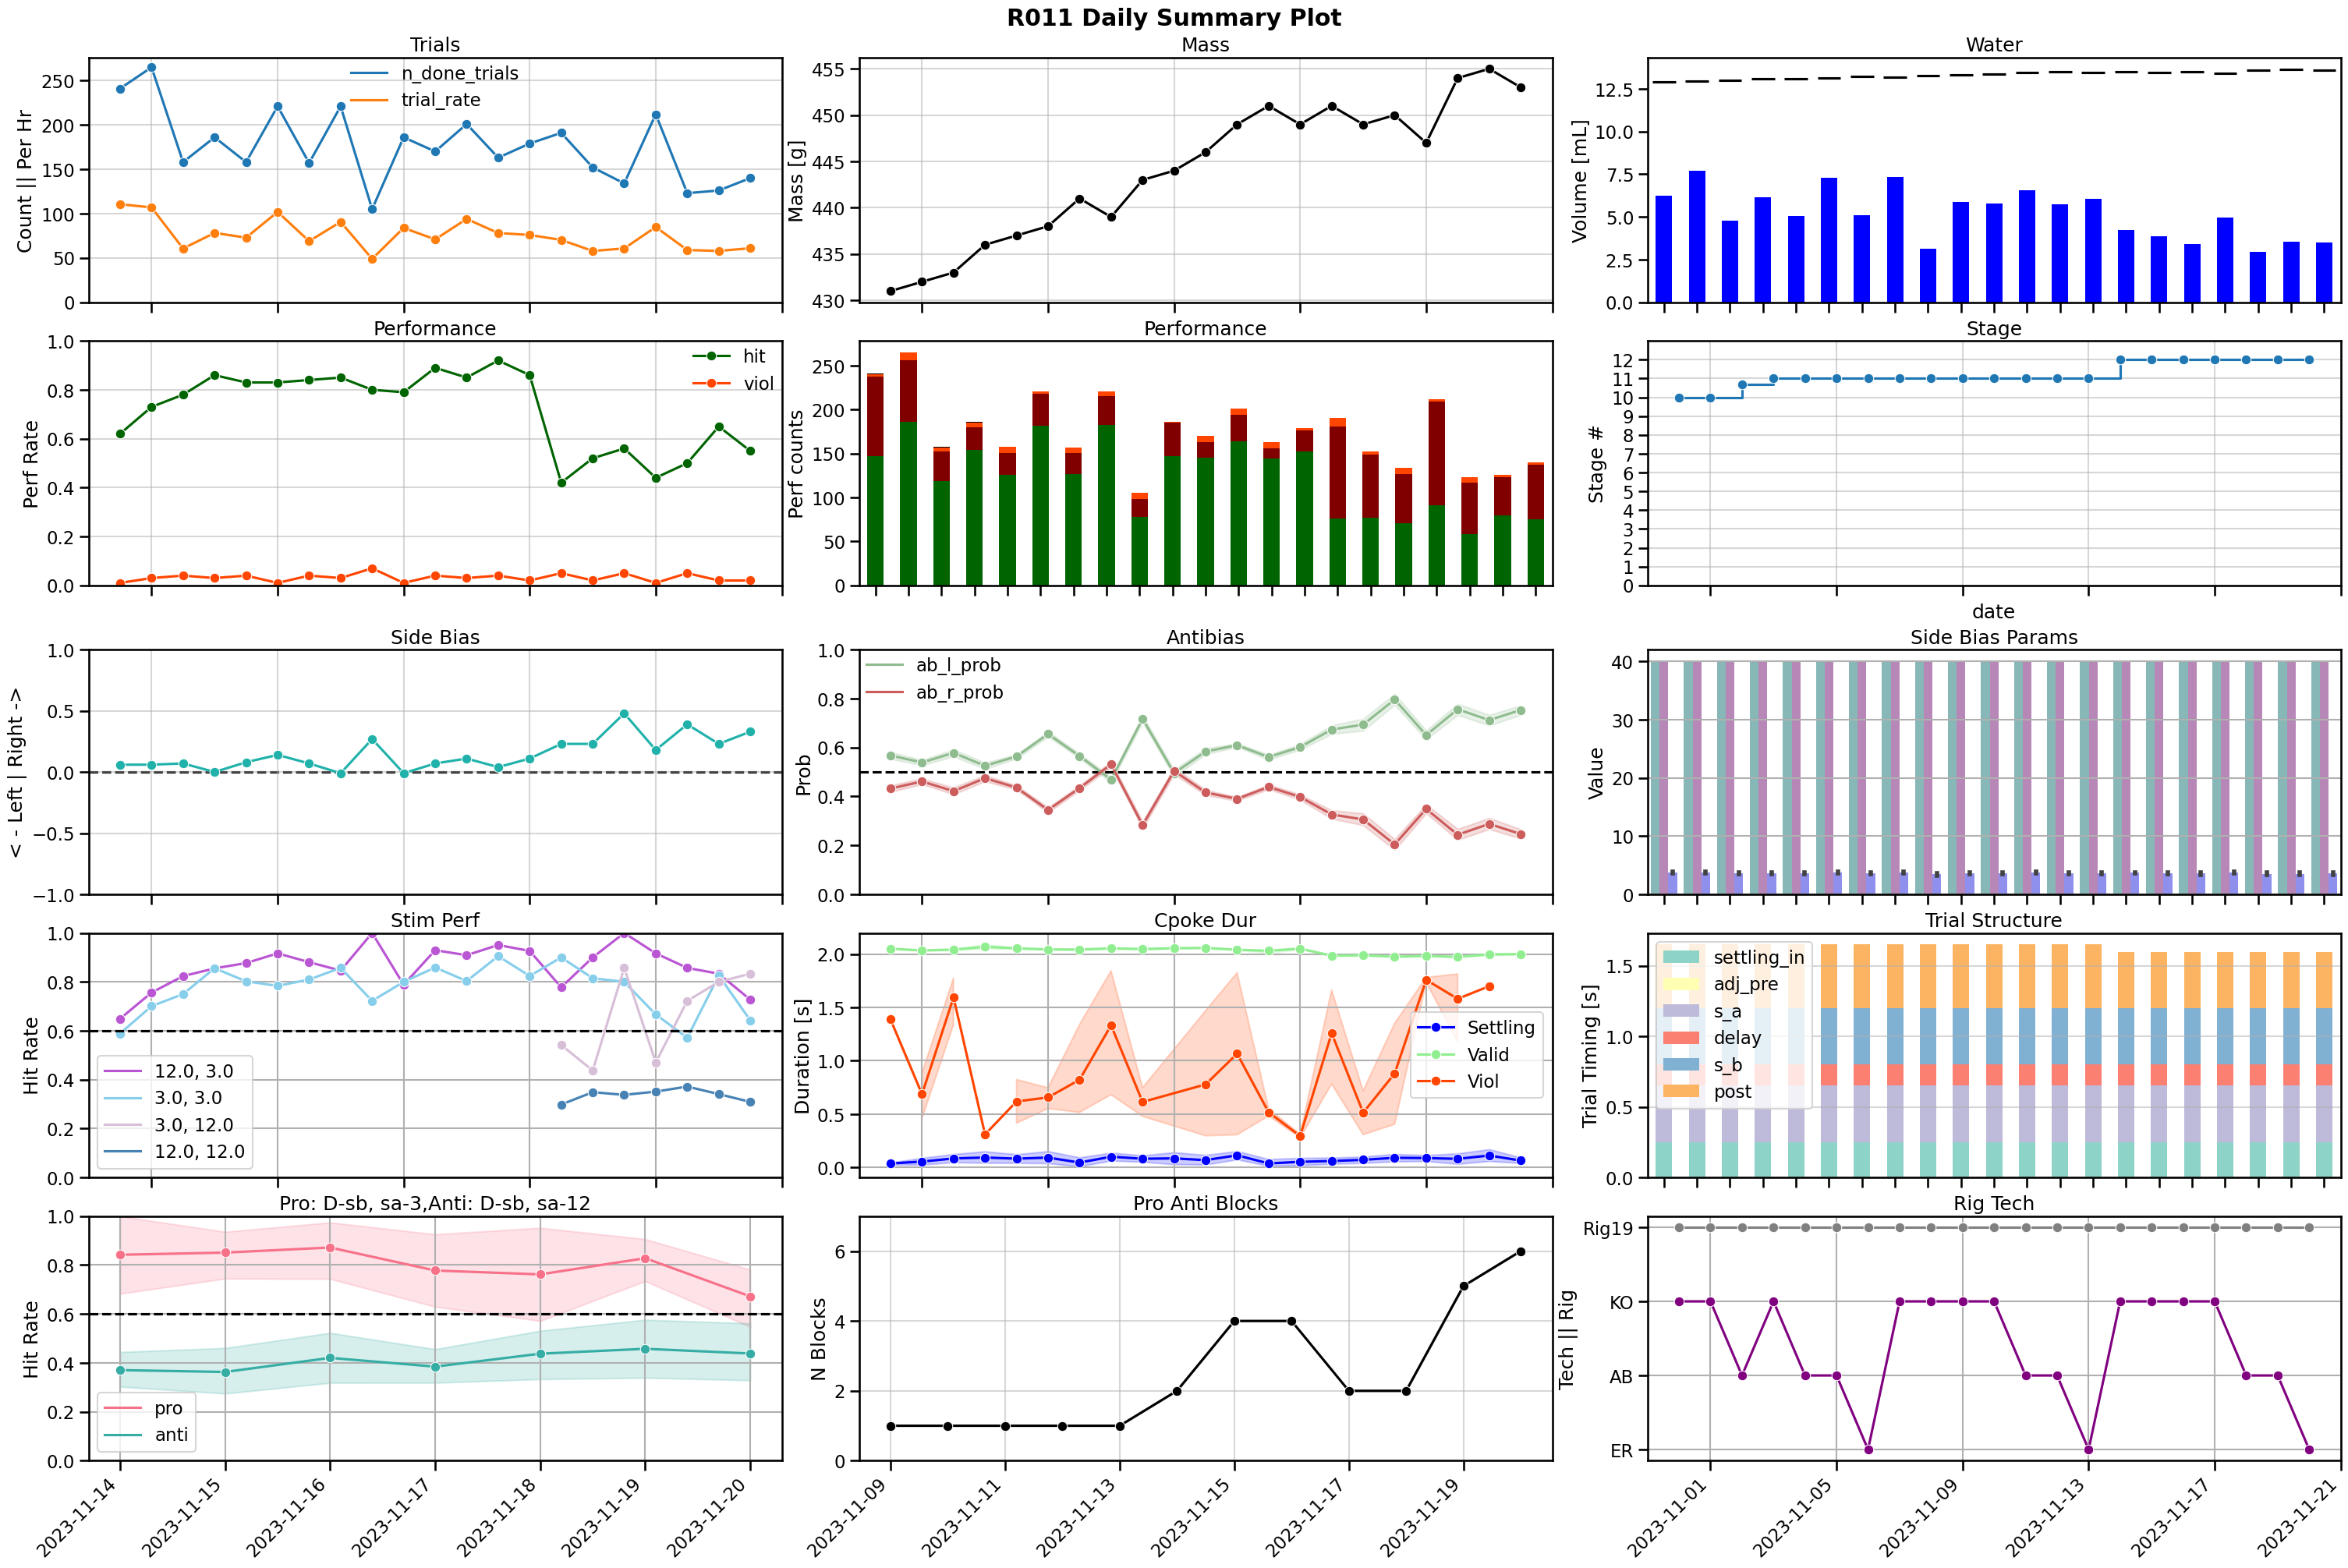

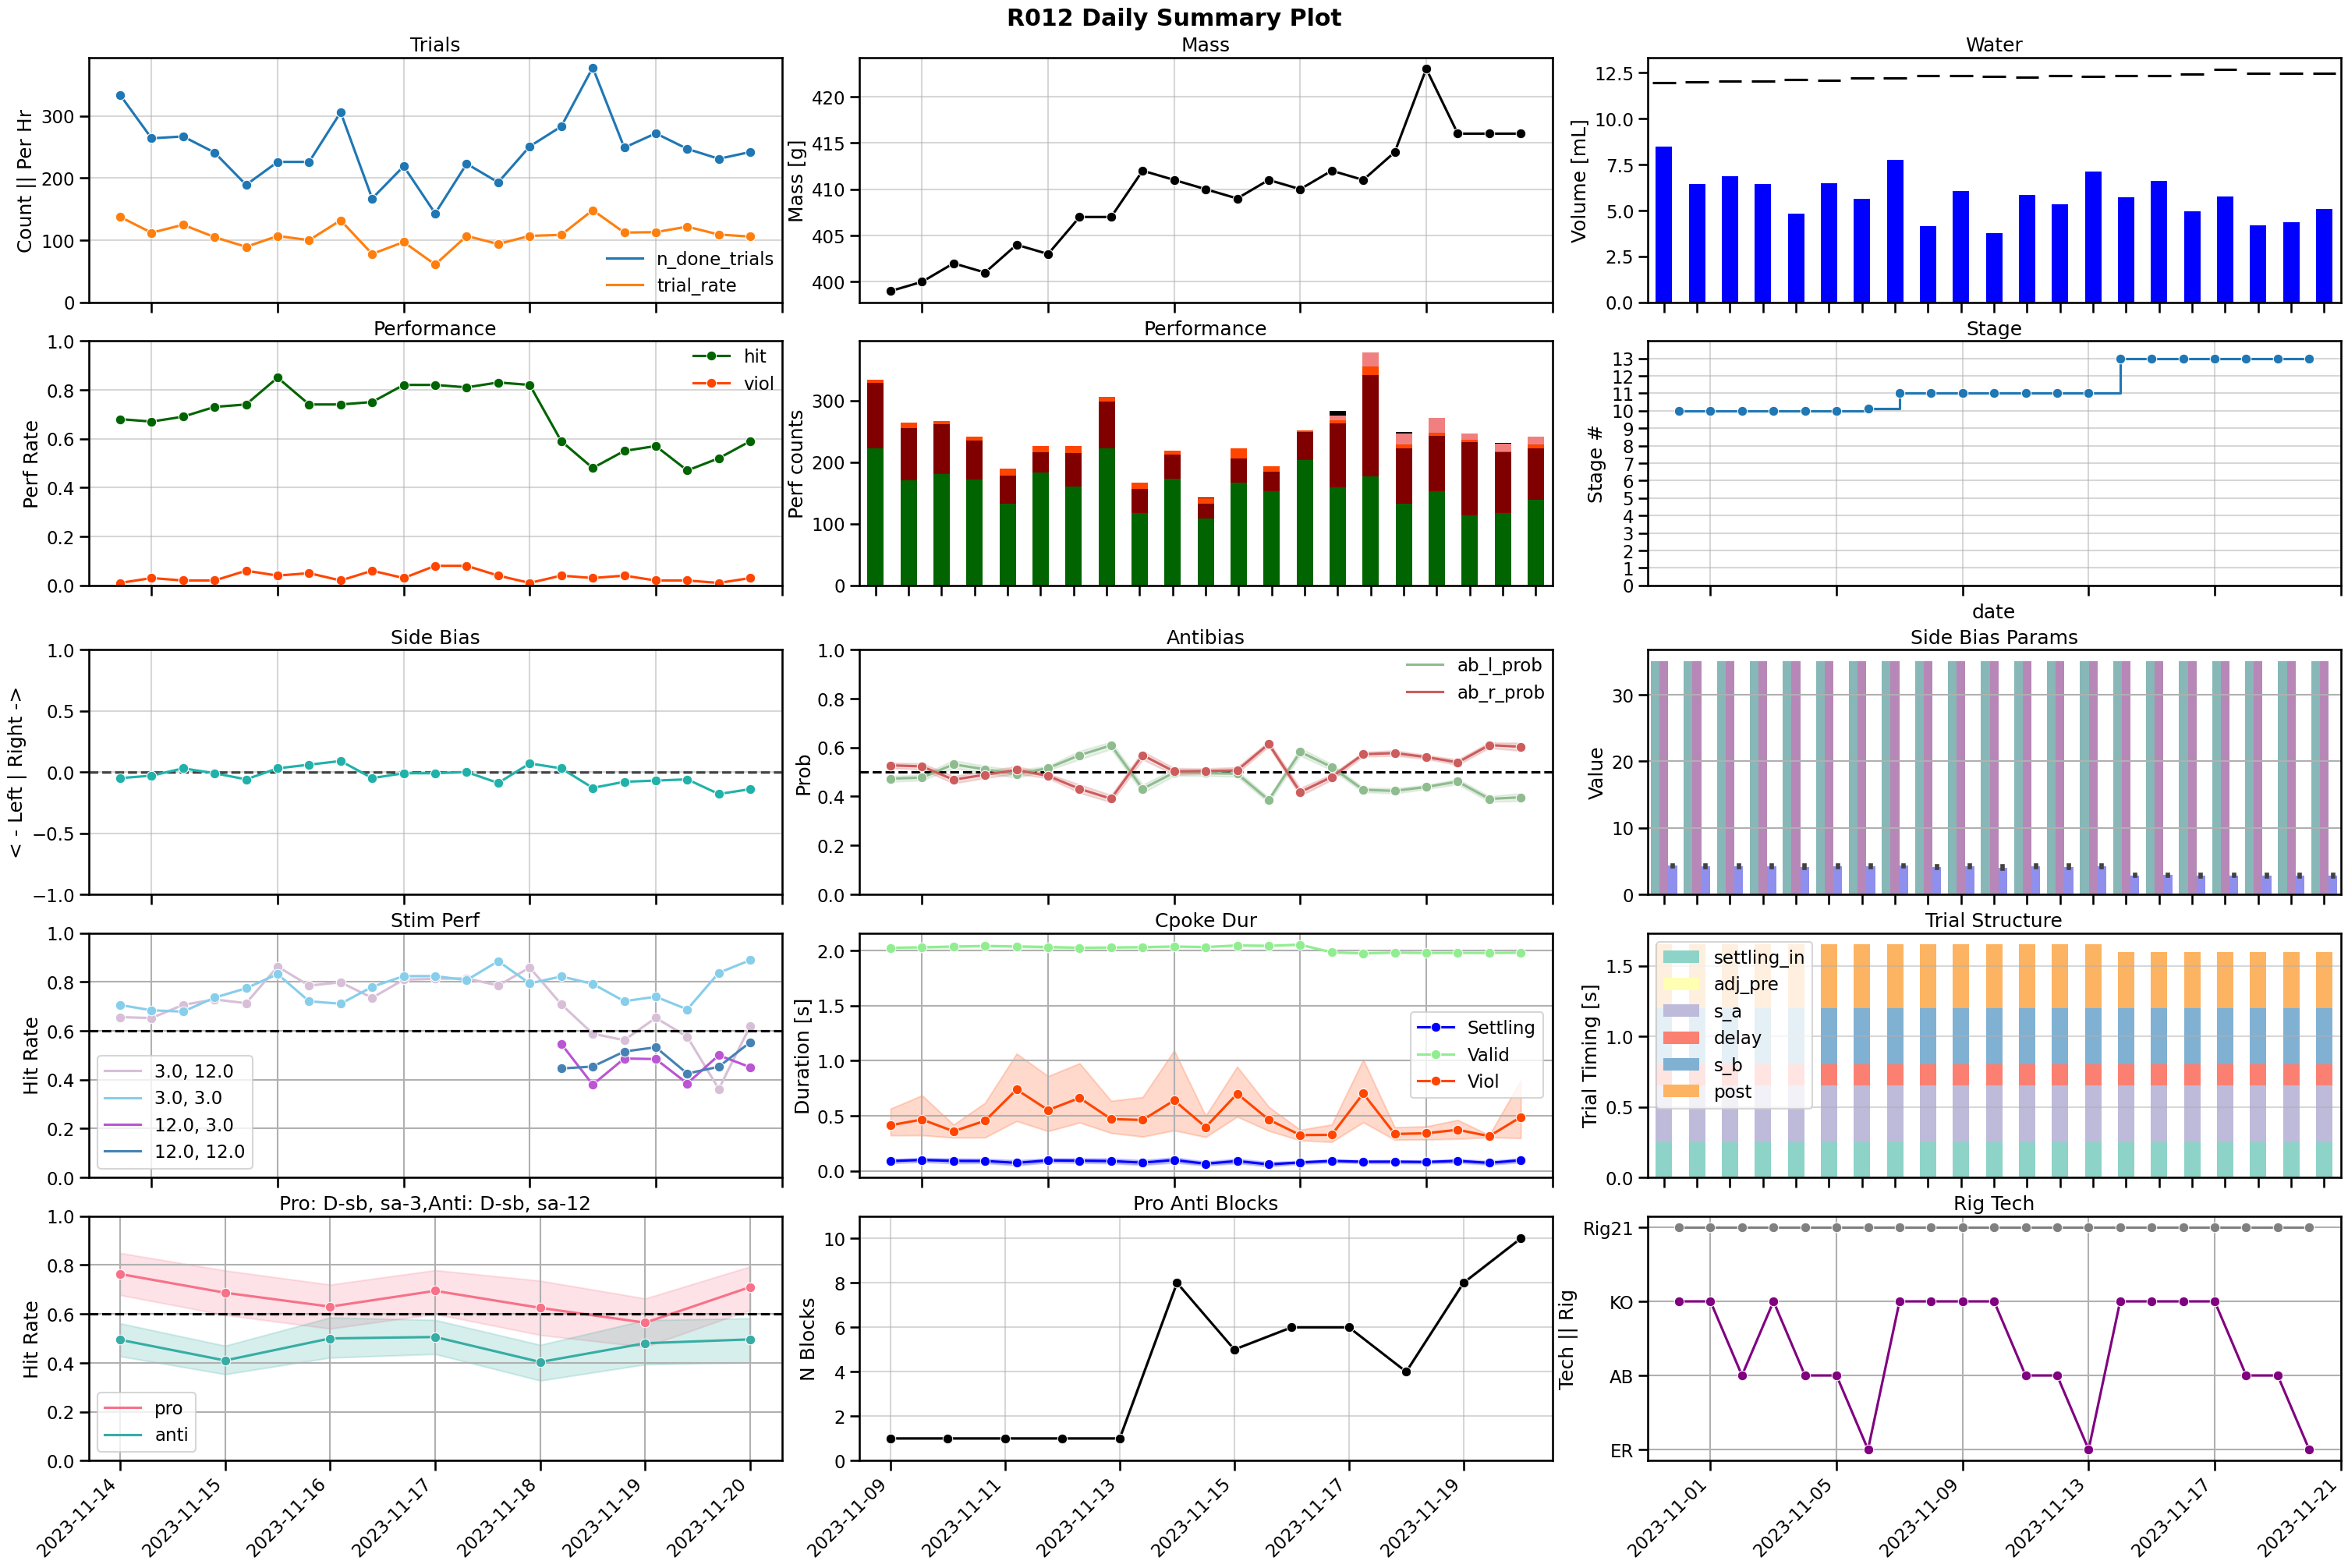

In [28]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(animal_id, animal_days_df, animal_trials_df)

In [29]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R010_2023-11-20_day_summary
['s_b', 'post', 'go']
making R011_2023-11-20_day_summary
[]
skipping violations by period due to hist error


c:\Users\JB\github\jbreda_animal_training\code\training_performance\plot_trials_info.py:1351: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  _ = sns.histplot(


making R012_2023-11-20_day_summary
['s_a', 'post']
